Written by Zain Kamal [zain.eris.kamal@rutgers.edu](mailto:zain.eris.kamal@rutgers.edu) on 03/07/2024.

https://github.com/Humboldt-Penguin/redplanet

---
GOAL:

- I just found out xarray does the 

---
# [0] Setup

In [1]:
from redplanet import utils

from pathlib import Path

import pooch
import numpy as np
import pandas as pd 
import xarray as xr

---
# [1] Test file downloading

In [2]:
with utils.disable_pooch_logger():
    fpaths_rawdat = pooch.retrieve(
        fname      = '2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip',
        url        = r'https://drive.google.com/file/d/1Z5Esv-Y4JAQvC84U-VataKJHIJ9OA4_8/view?usp=sharing',
        known_hash = 'sha256:45e047a645ae8d1bbd8e43062adab16a22786786ecb17d8e44bfc95f471ff9b7',
        path       = pooch.os_cache('redplanet') / 'GRS',
        downloader = utils.download_gdrive_file,
        processor  = pooch.Unzip(),
    )


fpaths_rawdat = [Path(f) for f in fpaths_rawdat if 'README_EBH_SK_AR_SK.txt' not in f]  # list comp is gross, basically just convert to pathlib.Path objects and remove the readme file

another idea is to create a pooch object, but tbf it ends up being way more trouble than it's worth than to just download one by one:

    => **THIS WAY I'M NOT UNNECESSARILY HAVING TO WRITE MORE CLASSES/CODE THAT NEED TO BE MAINTAINED/MONITORED! SIMPLE IS BETTER :))))

In [3]:
'''
alt idea is to create a pooch object, but tbf it ends up being way more trouble than it's worth than to just download one by one:
    => **THIS WAY I'M NOT UNNECESSARILY HAVING TO WRITE MORE CLASSES/CODE THAT NEED TO BE MAINTAINED/MONITORED! SIMPLE IS BETTER :))))
'''

# data_registry = {
#     '2022_Mars_Odyssey_GRS_Element_Concentration_Maps': {
#         'hash': 'sha256:45e047a645ae8d1bbd8e43062adab16a22786786ecb17d8e44bfc95f471ff9b7',
#         'url': 'https://drive.google.com/file/d/1Z5Esv-Y4JAQvC84U-VataKJHIJ9OA4_8/view?usp=sharing'
#     },
# }


# # {key: value['hash'] for key,value in data_registry.items()}
# # {key: value['url'] for key,value in data_registry.items()}

# __datapath = pooch.os_cache('redplanet')

# data_pooch = pooch.create(
#     path = __datapath, 
#     base_url = '', 
#     registry = {key: value['hash'] for key,value in data_registry.items()}, 
#     urls = {key: value['url'] for key,value in data_registry.items()}, 
# )

"\nalt idea is to create a pooch object, but tbf it ends up being way more trouble than it's worth than to just download one by one:\n    => **THIS WAY I'M NOT UNNECESSARILY HAVING TO WRITE MORE CLASSES/CODE THAT NEED TO BE MAINTAINED/MONITORED! SIMPLE IS BETTER :))))\n"

---
# [2] Load one file

In [4]:
fpath_rawdat = fpaths_rawdat[0]

In [5]:
df = pd.read_csv(
    fpath_rawdat, 
    # delim_whitespace=True, 
    sep='\s+',
    na_values=9999.999, 
    header=0, 
    usecols=[0,1,2,3], 
    names=['lat', 'lon', 'concentration', 'sigma'], 
)
dat_grs = xr.Dataset.from_dataframe(df.set_index(['lat', 'lon']))
dat_grs

<xarray.Dataset> Size: 42kB
Dimensions:        (lat: 36, lon: 72)
Coordinates:
  * lat            (lat) float64 288B -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * lon            (lon) float64 576B -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Data variables:
    concentration  (lat, lon) float64 21kB nan nan nan nan ... nan nan nan nan
    sigma          (lat, lon) float64 21kB nan nan nan nan ... nan nan nan nan

In [6]:
df.set_index(['lat', 'lon'])

concentration  sigma
lat   lon                         
 87.5  177.5            NaN    NaN
       172.5            NaN    NaN
       167.5            NaN    NaN
       162.5            NaN    NaN
       157.5            NaN    NaN
...                     ...    ...
-87.5 -157.5            NaN    NaN
      -162.5            NaN    NaN
      -167.5            NaN    NaN
      -172.5            NaN    NaN
      -177.5            NaN    NaN

[2592 rows x 2 columns]

In [7]:
dat_grs.sel(lon=[0], lat=[0], method="ffill")

<xarray.Dataset> Size: 32B
Dimensions:        (lat: 1, lon: 1)
Coordinates:
  * lat            (lat) float64 8B -2.5
  * lon            (lon) float64 8B -2.5
Data variables:
    concentration  (lat, lon) float64 8B 5.421
    sigma          (lat, lon) float64 8B 1.233

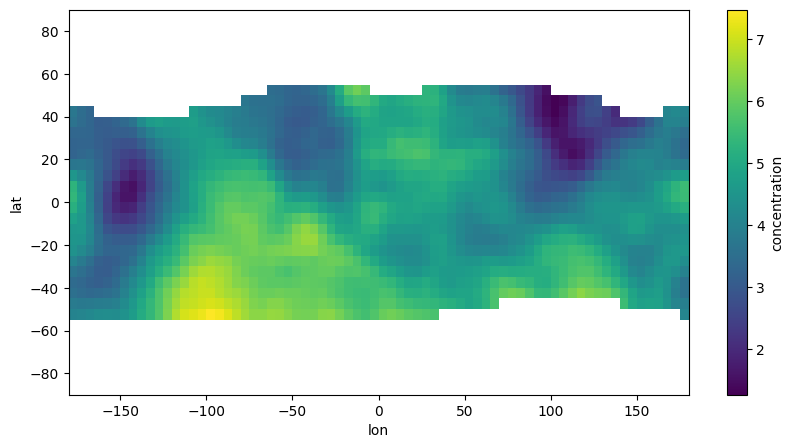

In [8]:
dat_grs.concentration.plot(figsize=(10,5))

---
# [3] Load all files (into one xarray)

In [9]:
fpaths_rawdat

[WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip.unzip/Al_GS2010_5x5.txt'),
 WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip.unzip/Ca_GS2010_5x5.txt'),
 WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip.unzip/Cl_GS2010_5x5.txt'),
 WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip.unzip/Fe_GS2010_5x5.txt'),
 WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip.unzip/H2O_GS2010_5x5.txt'),
 WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odyssey_GRS_Element_Concentration_Maps.zip.unzip/K_GS2010_5x5.txt'),
 WindowsPath('C:/Users/Eris/AppData/Local/redplanet/redplanet/Cache/GRS/2022_Mars_Odysse

In [10]:
dfs = []

for fpath_rawdat in fpaths_rawdat:
    element = fpath_rawdat.stem.split('_')[0].lower()

    df = pd.read_csv(
        fpath_rawdat, 
        sep='\s+', 
        na_values=9999.999, 
        header=0, 
        usecols=[0, 1, 2, 3], 
        names=['lat', 'lon', 'concentration', 'sigma']
    )
    df['element'] = element
    dfs.append(df)

all_dfs = pd.concat(dfs)

# dat_grs = xr.Dataset.from_dataframe(all_dfs.set_index(['lat', 'lon', 'element']))
# dat_grs = xr.Dataset.from_dataframe(all_dfs.set_index(['element', 'lon', 'lat']))
dat_grs = xr.Dataset.from_dataframe(all_dfs.set_index(['element', 'lat', 'lon']))

dat_grs

<xarray.Dataset> Size: 374kB
Dimensions:        (element: 9, lat: 36, lon: 72)
Coordinates:
  * element        (element) object 72B 'al' 'ca' 'cl' 'fe' ... 's' 'si' 'th'
  * lat            (lat) float64 288B -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * lon            (lon) float64 576B -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Data variables:
    concentration  (element, lat, lon) float64 187kB nan nan nan ... nan nan nan
    sigma          (element, lat, lon) float64 187kB nan nan nan ... nan nan nan

In [11]:
dat_grs

<xarray.Dataset> Size: 374kB
Dimensions:        (element: 9, lat: 36, lon: 72)
Coordinates:
  * element        (element) object 72B 'al' 'ca' 'cl' 'fe' ... 's' 'si' 'th'
  * lat            (lat) float64 288B -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * lon            (lon) float64 576B -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Data variables:
    concentration  (element, lat, lon) float64 187kB nan nan nan ... nan nan nan
    sigma          (element, lat, lon) float64 187kB nan nan nan ... nan nan nan

In [12]:
dat_grs.sel(element='th').sel(lon=0, lat=0, method='nearest')['concentration'].values

array(0.64111435)

In [13]:
dat_grs.sel(element='th').sel(lon=0, lat=0, method='nearest')['concentration'].item()

0.641114354

---
# [4] Time benchmark

In [14]:
def grs_get1(element, lon, lat, quantity='concentration'):
    return dat_grs.sel(element=element).sel(lon=lon, lat=lat, method='nearest')[quantity].item()

In [15]:
import time

element = 'th'
num_iterations = 1e4
num_iterations = int(num_iterations)
total_time_1 = 0

for _ in range(num_iterations):
    lon = np.random.uniform(-180, 180)
    lat = np.random.uniform(-90, 90)

    start_time = time.time()  
    grs_get1(element, lon, lat)  
    end_time = time.time()  
    total_time_1 += (end_time - start_time) 


average_time_1 = total_time_1 / num_iterations  # Calculate the average time
print(f"{num_iterations = }")
print()
print(f"- {average_time_1 = :.2e} sec")

num_iterations = 10000

- average_time_1 = 6.74e-04 sec


In [16]:
lons = np.linspace(-180,180,10000)
lats = np.linspace(-90,90,10000)






import time  # Import the time module

element = 'th'
# num_iterations = 1e4
num_iterations = lons.shape[0] * lats.shape[0]
num_iterations = int(num_iterations)
total_time_1 = 0

# for _ in range(num_iterations):
    # lon = np.random.uniform(-180, 180)
    # lat = np.random.uniform(-90, 90)

start_time = time.time()  
x = dat_grs.sel(element=element).sel(lon=lons, lat=lats, method='nearest')['concentration'].values
end_time = time.time()  
total_time_1 += (end_time - start_time) 


average_time_1 = total_time_1 / num_iterations  # Calculate the average time
print(f"{num_iterations = }")
print()
print(f"- {average_time_1 = :.2e} sec")

num_iterations = 100000000

- average_time_1 = 7.96e-09 sec


In [17]:
import matplotlib.pyplot as plt

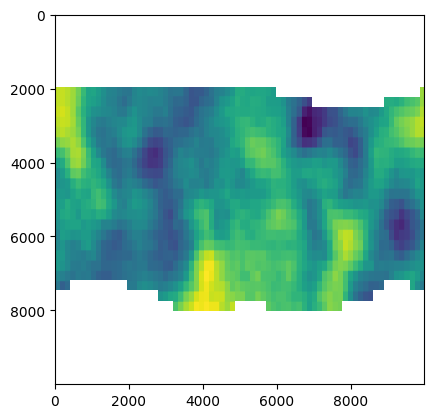

In [18]:
plt.imshow(x)

---
# [5] lol rip, check manual indexing i guess hahahahahhaha

In [19]:
lats = dat_grs.coords['lat'].values
lons = dat_grs.coords['lon'].values
elements = dat_grs.coords['element'].values.tolist()

dat_grs_dict = {}

dat_grs_dict['lats'] = lats
dat_grs_dict['lons'] = lons

for element in elements:
    dat_grs_dict[element] = {
        'concentration': dat_grs.sel(element=element).concentration.to_numpy(),
        'sigma':         dat_grs.sel(element=element).sigma.to_numpy(),
    }

In [20]:
utils.print_dict(dat_grs_dict)

'lats'
	<np.ndarray, shape=(36,)>
'lons'
	<np.ndarray, shape=(72,)>
'al'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'ca'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'cl'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'fe'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'h2o'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'k'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
's'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'si'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>
'th'
	'concentration'
		<np.ndarray, shape=(36, 72)>
	'sigma'
		<np.ndarray, shape=(36, 72)>


In [21]:
def grs_get2(element, lon, lat, quantity='concentration'):
    epsilon = -1e-3    # when picking a coordinate exactly between two datapoints, numpy and xarray return different values. so we add this term to "bump" coordinates slightly so they're always equal :)
    index_nearest_lat = np.argmin(np.abs(dat_grs_dict['lats'] - lat + epsilon))
    index_nearest_lon = np.argmin(np.abs(dat_grs_dict['lons'] - lon + epsilon))
    return dat_grs_dict[element][quantity][index_nearest_lat][index_nearest_lon] 

In [22]:
# u = -10
# print(dat_grs_dict['lats'])
# print()
# print(dat_grs_dict['lats'] - u)
# print()
# print(dat_grs_dict['lats'] - u - 1e-3)
# print()
# print(np.abs(dat_grs_dict['lats'] - u - 1e-3))

# ## biased to choose the right one

In [23]:
# u = 10
# print(dat_grs_dict['lats'])
# print()
# print(dat_grs_dict['lats'] - u)
# print()
# print(dat_grs_dict['lats'] - u - 1e-3)
# print()
# print(np.abs(dat_grs_dict['lats'] - u - 1e-3))

# ## biased to choose the right one

In [24]:
# element = 'th'
# lon = 0
# lat = 0

# np.argmin(np.abs(dat_grs_dict['lats'] - lat))


# # index_nearest_lat = np.argmin(np.abs(dat_grs_dict['lats'] - lat))
# # index_nearest_lon = np.argmin(np.abs(dat_grs_dict['lons'] - lon))
# # dat_grs_dict[element][quantity][index_nearest_lat][index_nearest_lon] 

In [25]:
# import time

# element = 'th'
# num_iterations = 1e5
# num_iterations = int(num_iterations)
# total_time_1 = 0

# for _ in range(num_iterations):
#     lon = np.random.uniform(-180, 180)
#     lat = np.random.uniform(-90, 90)

#     start_time = time.time()  
#     grs_get2(element, lon, lat)  
#     end_time = time.time()  
#     total_time_1 += (end_time - start_time) 


# average_time_1 = total_time_1 / num_iterations  # Calculate the average time
# print(f"{num_iterations = }")
# print()
# print(f"- {average_time_1 = :.2e} sec")

In [26]:
grs_get1('th',1,1) == grs_get2('th',1,1)

True

---
# [5.2] New time benchmark attempt

In [27]:
element = 'th'
num_iterations = 1e4
num_iterations = int(num_iterations)

lons = np.random.uniform(-180, 180, num_iterations)
lats = np.random.uniform(-90, 90, num_iterations)

coords = np.array([lons, lats]).T



import time

dat2 = []
start2 = time.time()
for coord in coords:
    dat2.append(grs_get2(element=element, lon=coord[0], lat=coord[1], quantity='concentration'))
end2 = time.time()
total2 = end2 - start2
dat2 = np.array(dat2)


dat1 = []
start1 = time.time()
for coord in coords:
    dat1.append(grs_get1(element=element, lon=coord[0], lat=coord[1], quantity='concentration'))
end1 = time.time()
total1 = end1 - start1
dat1 = np.array(dat1)


print(f'- grs_get1 (xarray): \t {total1/num_iterations :.2e} sec per iteration')
print(f'- grs_get2 (indexing): \t {total2/num_iterations :.2e} sec per iteration')

- grs_get1 (xarray): 	 6.43e-04 sec per iteration
- grs_get2 (indexing): 	 1.22e-05 sec per iteration


In [28]:
# Example arrays, possibly containing NaN values
array1 = dat1
array2 = dat2

# Finding the indices where either array has a NaN or the values are different
differences = (np.isnan(array1) != np.isnan(array2)) | ((array1 != array2) & ~(np.isnan(array1) & np.isnan(array2)))

# Print differing values from each array
print("Differing values in array1:", array1[differences])
print("Differing values in array2:", array2[differences])


Differing values in array1: [0.41880593 0.39066878 0.73757505 0.53187454 0.69107616]
Differing values in array2: [0.40567261 0.42439199 0.73804331 0.51676995 0.68697453]


deal with cases where coordinate is exactly btwn 2 things, xarray and numpy give diff answers so be careful (we solve this by adding an epsilon to the manual indexing method)

In [29]:
grs_get1('th', 1, 1)

0.641114354

In [30]:
epsilon = 1e-5

lon = 0
lat = 0


v1 = grs_get1('th', lon, lat)
v2 = grs_get2('th', lon, lat)


print(v1 == v2)

True


In [31]:
'''this code also shows how xarray is EXPONENTIALLY faster when accessing LARGE SWATHS of values (tbh maybe just go with xarray only, since if you're doing lots of calculations then i'd just recommend you use the swath method? but i guess issues arise when you're bouncing all over the place.... but still isn't it just faster to use xarray?????)'''

# lons = np.arange(-180,180)
# lats = np.arange(-90,90)
lons = np.arange(-26,-24,0.1)
lats = np.arange(-26,-24,0.1)


start = time.time()
x1 = dat_grs.sel(element='th').sel(lon=lons, lat=lats, method='nearest')['concentration'].values    
# x1 = np.array([[grs_get1('th', lon=lon, lat=lat) for lon in lons] for lat in lats])
end = time.time()
print(f'{end-start : .3e} sec')


start = time.time()
x2 = np.array([[grs_get2('th', lon=lon, lat=lat) for lon in lons] for lat in lats])
end = time.time()
print(f'{end-start : .3e} sec')


np.nanmax(x1 - x2) # if output is 0.0 then we chillin

 2.686e-03 sec
 6.022e-03 sec


0.0

In [32]:
a = np.arange(-1,1,0.1)
b = np.arange(-2,2,0.1)

for x in a:
    if x not in b:
        print(x)

-1.0
-0.9
-0.8
-0.7000000000000001
-0.6000000000000001
-0.5000000000000001
-0.40000000000000013
-0.30000000000000016
-0.20000000000000018
-0.1000000000000002
-2.220446049250313e-16
0.09999999999999964
0.19999999999999973
0.2999999999999998
0.3999999999999997
0.49999999999999956
0.5999999999999996
0.6999999999999997
0.7999999999999996
0.8999999999999995


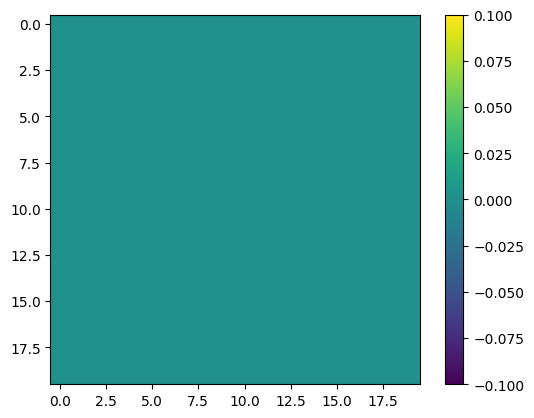

In [33]:
diff = x1-x2


plt.imshow(diff)
plt.colorbar()

In [34]:
# Example arrays, possibly containing NaN values
array1 = x1
array2 = x2

# Finding the indices where either array has a NaN or the values are different
differences = (np.isnan(array1) != np.isnan(array2)) | ((array1 != array2) & ~(np.isnan(array1) & np.isnan(array2)))

# Print differing values from each array
# print("Differing values in array1:", array1[differences])
# print("Differing values in array2:", array2[differences])

print(np.sum(differences))

0


In [35]:
# epsilon = 1e-10

# lon = 10
# lat = -11

# left  = grs_get2('th' ,lon-0.1, lat)
# right = grs_get2('th' ,lon+0.1, lat)
# print(f"left:  {left}")
# print(f"right: {right}")
# print()

# g1 = grs_get1('th', lon, lat)
# g2 = grs_get2('th', lon, lat)

# print(g1)
# print(g2)
# print(np.equal(g1,g2))

# print()
# print(g1 == right)
# print(g2 == left)

In [36]:
# epsilon = 1e-10

# lon = -11
# lat = -50

# bottom  = grs_get2('th' ,lon, lat-0.1)
# top     = grs_get2('th' ,lon, lat+0.1)
# print(f"bottom: {bottom}")
# print(f"top:    {top}")
# print()

# g1 = grs_get1('th', lon, lat)
# g2 = grs_get2('th', lon, lat)

# print(g1)
# print(g2)
# print(np.equal(g1,g2))

# print()
# print(g1 == top)
# print(g2 == bottom)

---
im gonna kms


In [37]:
element = 'th'

lons = np.arange(-1, 1, 0.1)
lats = np.arange(-1, 1, 0.1)

lons = np.round(lons,2)
lats = np.round(lats,2)

# coords = np.array([lons, lats]).T
coords = np.array(np.meshgrid(lons, lats)).T.reshape(-1, 2) 





dat1 = []
for coord in coords:
    dat1.append(grs_get1(element=element, lon=coord[0], lat=coord[1], quantity='concentration'))
dat1 = np.array(dat1)



dat2 = []
for coord in coords:
    dat2.append(grs_get2(element=element, lon=coord[0], lat=coord[1], quantity='concentration'))
dat2 = np.array(dat2)


In [38]:
diff_mask = ~np.equal(dat1,dat2)

for i,val in enumerate(diff_mask):
    if val:
        print(f'{i = }')
        print(f'\t{dat1[i] = }')
        print(f'\t{dat2[i] = }')
        print(f'\t{coords[i] = }')

---
# [6] kdtrees (just curious lol)

In [39]:
# # from scipy.spatial import KDTree
# # import numpy as np

# # # Assuming dat_grs_dict['lats'] and dat_grs_dict['lons'] are your latitude and longitude arrays
# # coords = np.column_stack((dat_grs_dict['lats'], dat_grs_dict['lons']))
# # tree = KDTree(coords)


# import numpy as np
# from scipy.spatial import KDTree

# # Creating a mesh of latitude and longitude coordinates
# latitudes, longitudes = np.meshgrid(dat_grs_dict['lats'], dat_grs_dict['lons'], indexing='ij')

# # Flattening the latitude and longitude arrays
# flat_lats = latitudes.flatten()
# flat_lons = longitudes.flatten()

# # Now, use np.column_stack to combine these into coordinates
# coords = np.column_stack((flat_lats, flat_lons))

# # Creating the KDTree
# tree = KDTree(coords)


# def grs_get3(element, lon, lat, quantity='concentration'):
#     _, index_nearest = tree.query([lat, lon])
#     return dat_grs_dict[element][quantity].flat[index_nearest]


In [40]:
# import time

# element = 'th'
# num_iterations = 1e5
# num_iterations = int(num_iterations)
# total_time_1 = 0

# for _ in range(num_iterations):
#     lon = np.random.uniform(-180, 180)
#     lat = np.random.uniform(-90, 90)

#     start_time = time.time()  
#     grs_get3(element, lon, lat)  
#     end_time = time.time()  
#     total_time_1 += (end_time - start_time) 


# average_time_1 = total_time_1 / num_iterations  # Calculate the average time
# print(f"{num_iterations = }")
# print()
# print(f"- {average_time_1 = :.2e} sec")